<br>
<br>

# Vehicle Type Classification

## Application: Assign parking spaces, driving ban, toll station

<br>

## Team Members:

### Jakob Bleickert: Preprocessing
### Lukas Harzheim: Measurement
### Konstantin Paulus: Classification

<br>

## 1. Preprocessing

### capture video

In [10]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls width="720" src="../datasets/side_daihatsu.mov">
    </video>
    """)

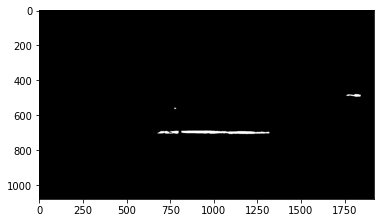

There are 9253 set to 255


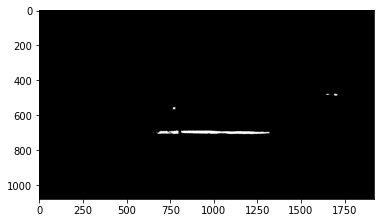

There are 9171 set to 255


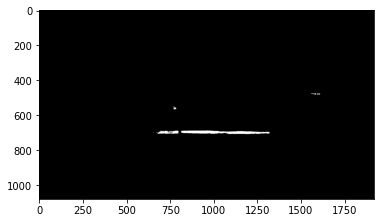

There are 8873 set to 255


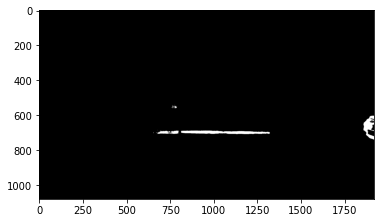

There are 13611 set to 255


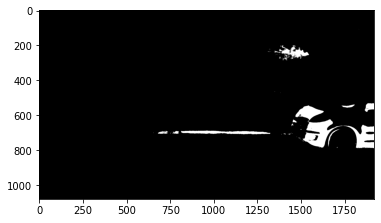

There are 51406 set to 255


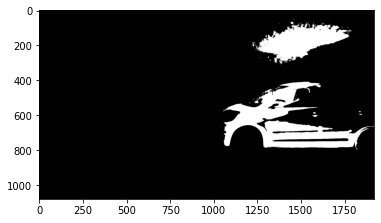

There are 180633 set to 255


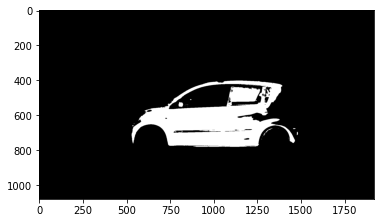

There are 176279 set to 255


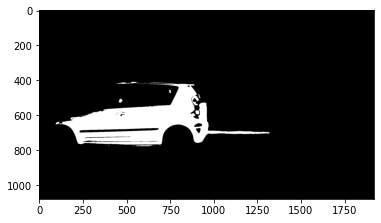

There are 151449 set to 255


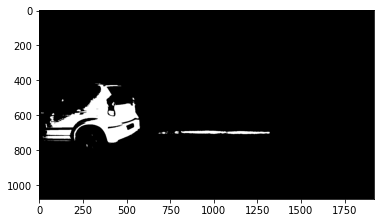

There are 78112 set to 255


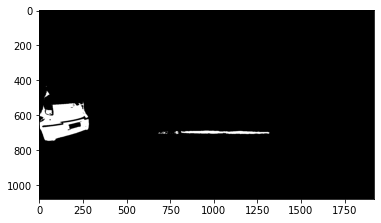

There are 47795 set to 255


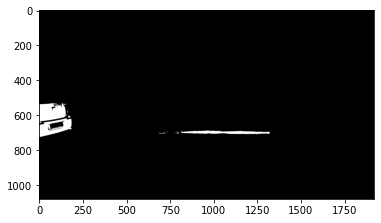

There are 30759 set to 255


In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


cap = cv2.VideoCapture('../datasets/side_daihatsu.mov')                     # capture

count = 0                                                                   # frames passed
x = []                                                                      # frame
y = []                                                                      # amount of pixels

while cap.isOpened():                                                       # for each frame
    ret, frame = cap.read()

    if ret:
        count += 21                                                         # frames per second
        
        blur = cv2.blur(frame,(5,5))                                        # filters
        blur0=cv2.medianBlur(blur,5)
        blur1= cv2.GaussianBlur(blur0,(5,5),0)
        blur2= cv2.bilateralFilter(blur1,9,75,75)

        hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)                        # color filter

        low = np.array([60, 40, 50])                                        # mask
        high = np.array([255, 255, 255])
        mask = cv2.inRange(hsv, low, high)

        res = cv2.bitwise_and(frame,frame, mask= mask)                      # bitwise conjunction
        gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)                        # gray picture
        _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)         # threshhold

        plt.imshow(thresh, cmap='gray')
        plt.show()
    
        nonzero = np.count_nonzero(thresh)                                  # count nonzero pixels
        print(f'There are {nonzero} set to 255')

        x.append(count)                                                     # save values for plotting
        y.append(nonzero)
        
        cap.set(1, count)                                                   # 21 frames ahead

    else:
        #cap.release()
        break


<br>
<br>

### analyse frames

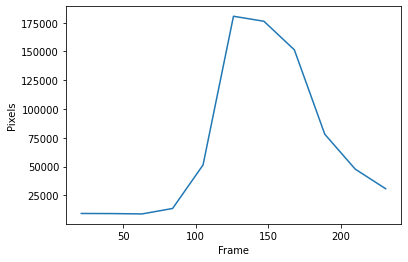

Maximum for Frame: 126


In [8]:
plt.plot(x, y)                                                              # plot nonzero pixels over frame
plt.ylabel('Pixels')
plt.xlabel('Frame')
plt.show()

a = np.array([x, y])                                                        # find maximum value and index in array
v = np.amax(a)
u = np.where(a == v)
final_frame = u [1][0] *21 + 21
print('Maximum for Frame:', final_frame)

<br>
<br>

### preprocessing final frame

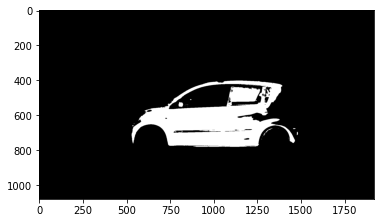

In [9]:
cap.set(1,final_frame)                                                      # extract final frame
ret, frame = cap.read()

blur = cv2.blur(frame,(5,5))                                                # preprocessing again
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)
low = np.array([60, 40, 50])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv, low, high)
res = cv2.bitwise_and(frame,frame, mask= mask)
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')